# Principal Component Analysis

This jupyter notebook illustrates the basics of PCA.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import d_PCA

%matplotlib inline 

## Linearly correlated toy data with two variables

In [14]:
# 1. generate the raw data
x1 = np.arange(start=0, stop=20, step=0.1)
num_of_samples = len(x1)

standard_deviation = 0.5

cur_scale = standard_deviation

x2 = 2 * x1 + np.random.normal(loc=0, scale=cur_scale, size=num_of_samples)

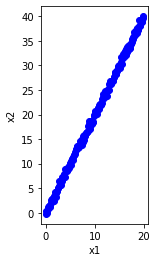

In [15]:
# 2. visualize the raw data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x1, x2, color='blue')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_aspect('equal', 'box')

In [17]:
# 3. do PCA
dataForAnalysis = np.column_stack((x1, x2))

num_of_components = min(dataForAnalysis.shape[0], dataForAnalysis.shape[1])

object_pca = d_PCA.MyPCA(num_of_components=num_of_components)
pca_results = object_pca.fit_transform(x=dataForAnalysis, corr_logic=use_corr)

# scree plot
fig, ax = plt.subplots()
ax.scatter(range(len(pca_results['percent_variance_explained'])), pca_results['percent_variance_explained'], color='blue')
ax.set_title('scree plot')
ax.set_xlabel('PC index')
ax.set_ylabel('percent variance explained')
ax.set_ylim((-10.0, 110.0))

AttributeError: module 'd_PCA' has no attribute 'MyPCA'

In [ ]:
# scores plot
fig, ax = plt.subplots()
ax.scatter(pca_results['scores'][:, 0], pca_results['scores'][:, 1], color='blue')
ax.set_title('scores plot')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
fig.show()

fig, ax = plt.subplots()
ax.scatter(pca_results['scores'][:, 0], pca_results['scores'][:, 1], color='blue')
ax.set_title('scores plot')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_ylim((2*min(pca_results['scores'][:, 1]), max(x2)))
fig.show()

In [ ]:
# loadings plot
fig, ax = plt.subplots()
ax.scatter(pca_results['loadings'][:, 0], pca_results['loadings'][:, 1], color='blue')
ax.set_title('loadings plot')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
for i in range(pca_results['loadings'].shape[0]):
ax.text(pca_results['loadings'][i, 0], pca_results['loadings'][i, 1], 'x'+str(i+1))
fig.show()

# PCA in the context of the raw data
fig, ax = plt.subplots()
k = -20
ax.scatter(x1, x2, color='blue')
ax.plot([0, -20*pca_results['loadings'][0, 0]], [0, -20*pca_results['loadings'][1, 0]],
    color='red', linewidth=3, label='PC 1')
ax.plot([0, 20 * pca_results['loadings'][0, 1]], [0, 20 * pca_results['loadings'][1, 1]],
    color='green', linewidth=3, label='PC 2')
ax.set_title('raw data and PC axis')
ax.set_aspect('equal', 'box')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
fig.show()

# PCA in the context of the raw data
k = 20
fig, ax = plt.subplots()
ax.scatter(x1, x2, color='blue')
ax.plot([0, k*pca_results['loadings'][0, 0]], [0, k*pca_results['loadings'][1, 0]],
    color='red', linewidth=3, label='PC 1')
ax.plot([0, (-k) * pca_results['loadings'][0, 1]], [0, (-k) * pca_results['loadings'][1, 1]],
    color='green', linewidth=3, label='PC 2')
ax.set_title('raw data and PC axis')
ax.set_aspect('equal', 'box')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
fig.show()

In [ ]:
# keep only the first dimension
data_reconstructed = np.matmul(pca_results['scores'][:, 0].reshape((200, 1)), pca_results['loadings'][:, 0].reshape((1, 2)))
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('reconstructed data using PC1')
ax.scatter(data_reconstructed[:, 0], data_reconstructed[:, 1], color='blue')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
fig.show()